# Tidy Data

Author: [Alexandre Gramfort](http://alexandre.gramfort.net)

<img src="img/borat.png" width=50%>

Based on the work of [J.F. Puget](https://www.ibm.com/developerworks/community/blogs/jfp/entry/Tidy_Data_In_Python?lang=en)

This lecture is based on the article from Hadley Wickham: [Tidy Data](http://vita.had.co.nz/papers/tidy-data.pdf).

If you don't know Hadley Wickham see https://en.wikipedia.org/wiki/Hadley_Wickham

Let's start.

In [1]:
%matplotlib inline

## Motivation

It is often said that data scientists spend only 20% of their time analyzing their data, and 80% of time cleaning it. Indeed, maintaining a tidy, easy-to-use dataset is crucial for any data analysis especially if it's "big data".

In the paper Tidy Data, Hadley Wickham gives **definitions of tidy and messy data** so that all data scientists can keep their work organized.

In this lecture, you'll learn to transform messy datasets into tidy datasets using the pandas package in python.

We only need two Python packages here.

In [2]:
import pandas as pd
import numpy as np

Let's show readers which versions we are using.

In [3]:
pd.__version__

'1.5.2'

In [4]:
work = pd.DataFrame([[80., 20.]], columns=['Data cleaning', 'Machine Learning'])
work

,Data cleaning,Machine Learning
0,80.0,20.0


In [5]:
work = work.T
work

,0
Data cleaning,80.0
Machine Learning,20.0


In [6]:
work.columns = ['Work pct.']

<AxesSubplot: ylabel='Work pct.'>

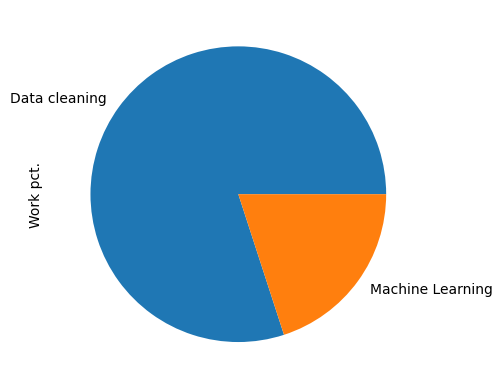

In [7]:
work['Work pct.'].plot(kind='pie')

### Tidy Data and Messy Data

What exactly marks the difference between *tidy* data and *messy* data? It is not only how organized and intuitive the datasets look to our human eyes, but also how **easily and efficiently they can be processed by computers**.

In his seminal paper [Tidy Data](https://www.jstatsoft.org/article/view/v059i10), Hadley Wickham proposed three standards for tidy data:

1. Each variable forms a **column**
2. Each observation forms a **row**
3. Each type of observation forms a **unit**.

Here, we'll focus on the first two rules and show you how we can use the Python package [pandas](http://pandas.pydata.org/) to deal with datasets violating them.

## Introduction

Let's get started, with a dataframe called `messy`.

This dataset, which appears in Wickham's paper, shows the number of people who choose either of two treatments in a hospital.

In [8]:
messy = pd.DataFrame({'First' : ['John', 'Jane', 'Mary'], 
                      'Last' : ['Smith', 'Doe', 'Johnson'], 
                      'Treatment A' : [np.nan, 16, 3], 
                      'Treatment B' : [2, 11, 1]})
messy

,First,Last,Treatment A,Treatment B
0,John,Smith,NaN,2
1,Jane,Doe,16.0,11
2,Mary,Johnson,3.0,1


Observe its structure in comparison with Wickham's rules.

This dataset is *messy* because it violates rule #2: it combines Treatment A and Treatment B, two distinct observations, in a single row.

**Messy data sets exist because they are often convenient for showing them to human** as they are compact.
This explains why this form is often used in publications.

People may prefer the transpose view of that data set

In [9]:
messy.T

,0,1,2
First,John,Jane,Mary
Last,Smith,Doe,Johnson
Treatment A,NaN,16.0,3.0
Treatment B,2,11,1


**Messy data sets are not that easy to process by statistical or machine learning packages.**

These often assume that examples are provided as rows in a 2d array whose columns are features. This is precisely what a tidy data set is.

Applying the `melt()` function to it creates a tidy version of it.

In [10]:
messy

,First,Last,Treatment A,Treatment B
0,John,Smith,NaN,2
1,Jane,Doe,16.0,11
2,Mary,Johnson,3.0,1


In [11]:
tidy = pd.melt(messy, id_vars=['First','Last'])
tidy

,First,Last,variable,value
0,John,Smith,Treatment A,NaN
1,Jane,Doe,Treatment A,16.0
2,Mary,Johnson,Treatment A,3.0
3,John,Smith,Treatment B,2.0
4,Jane,Doe,Treatment B,11.0
5,Mary,Johnson,Treatment B,1.0


The values are fine but column names aren't really meaningful.  Fortinately, the `melt()` function has arguments for renaming them.

In [12]:
tidy = pd.melt(messy, id_vars=['First','Last'],
               var_name='treatment', value_name='result')
tidy

,First,Last,treatment,result
0,John,Smith,Treatment A,NaN
1,Jane,Doe,Treatment A,16.0
2,Mary,Johnson,Treatment A,3.0
3,John,Smith,Treatment B,2.0
4,Jane,Doe,Treatment B,11.0
5,Mary,Johnson,Treatment B,1.0


## A simple(r) melt example

In [13]:
messy = pd.DataFrame({'row' : ['A', 'B', 'C'], 
                      'a' : [1, 2, 3],
                      'b' : [4, 5, 6],
                      'c' : [7, 8, 9]})
messy

,row,a,b,c
0,A,1,4,7
1,B,2,5,8
2,C,3,6,9


In [14]:
pd.melt(messy, id_vars='row')

,row,variable,value
0,A,a,1
1,B,a,2
2,C,a,3
3,A,b,4
4,B,b,5
5,C,b,6
6,A,c,7
7,B,c,8
8,C,c,9


In [15]:
tidy = pd.melt(messy, id_vars='row', var_name='dimension',
               value_name='length')
tidy

,row,dimension,length
0,A,a,1
1,B,a,2
2,C,a,3
3,A,b,4
4,B,b,5
5,C,b,6
6,A,c,7
7,B,c,8
8,C,c,9


Pivot is almost the inverse of melt

In [16]:
messy1 = tidy.pivot(index='row', columns='dimension',
                    values='length')
messy1

dimension,a,b,c
row,,,
A,1,4,7
B,2,5,8
C,3,6,9


This is almost the same as the orginal dataframe, except that row is used as index.  We can move it back to a row easily.

In [17]:
messy1.reset_index(inplace=True)
messy1

dimension,row,a,b,c
0,A,1,4,7
1,B,2,5,8
2,C,3,6,9


Last step is to remove the name for the set of columns.

In [18]:
messy1.columns.name = ''
messy1

,row,a,b,c
0,A,1,4,7
1,B,2,5,8
2,C,3,6,9


This is the same as the original dataframe, up to column reordering.

## Column headers are values, not variable names

This is the first issue with messy data in Hadley's paper.  Let's first create the dataframe used as an example.

For practical reasons, it was simpler to first construct the transpose of it.

In [19]:
messy = pd.DataFrame({'Agnostic' : [27, 34, 60, 81, 76, 137],
                      'Atheist' : [12, 27, 37, 52, 35, 70],
                      'Buddhist' : [27, 21, 30, 34, 33, 58],
                      'Catholic' : [418, 617, 732, 670, 638, 1116],
                      "Don't know/refused" : [15, 14, 15, 11, 10, 35],
                      'Evangelical Prot' : [575, 869, 1064, 982, 881, 1486],
                      'Hindu' : [1, 9, 7, 9, 11, 34],
                      'Historically Black Prot' : [228, 244, 236, 238, 197, 223],
                      "Jehovah's Witness" : [20, 27, 24, 24, 21, 30],
                      'Jewish' : [19, 19, 25, 25, 30, 95],
                     })
    
def transpose(df, columns):
    df = df.T.copy()
    df.reset_index(inplace=True)
    df.columns = columns
    return df

messy = transpose(messy, ['religion', '<$10k', '$10-20k', '$20-30k',
                          '$30-40k', '$40-50k', '$50-75k'])

messy

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Don't know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovah's Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


<div class="alert alert-success">
    <b>QUESTION</b>:
     <ul>
      <li>Why is the dataset messy?</li>
    </ul>
</div>

it violates rule 1: each column forms a variable, however here column 0 is the religion(one variable) but the others are the income ranges(should be one variable), also rule 2: each row is not an observation but a type of observations(religion).

Again, the `melt()` function is our friend.  We sort the result by religion to make it easier to read.

In [20]:
tidy = pd.melt(messy, id_vars=['religion'],
               var_name='income', value_name='freq')
tidy.sort_values(by=['religion'], inplace=True)
tidy.head(12)

,religion,income,freq
0,Agnostic,<$10k,27
30,Agnostic,$30-40k,81
40,Agnostic,$40-50k,76
50,Agnostic,$50-75k,137
10,Agnostic,$10-20k,34
20,Agnostic,$20-30k,60
41,Atheist,$40-50k,35
21,Atheist,$20-30k,37
11,Atheist,$10-20k,27
31,Atheist,$30-40k,52


In [22]:
tidy.groupby('religion').sum(numeric_only=True)

,freq
religion,
Agnostic,415
Atheist,233
Buddhist,203
Catholic,4191
Don't know/refused,100
Evangelical Prot,5857
Hindu,71
Historically Black Prot,1366
Jehovah's Witness,146


## Variables are stored in both rows and columns

This example is a little trickier. This dataset comes from the World Health Organisation, and records the counts of confirmed tuberculosis (TB) cases by country, year, and demographic group.  We first read the input data as a data frame.

This data is available at https://github.com/hadley/tidy-data/blob/master/data/tb.csv

Reading it is easy. We remove the `new_sp_` prefix appearing in most columns, and we rename a couple of columns as well.

In [23]:
url = "https://raw.githubusercontent.com/hadley/tidy-data/master/data/tb.csv"
tb = pd.read_csv(url)
tb.columns = tb.columns.str.replace('new_sp_','')
tb.rename(columns = {'new_sp' : 'total', 'iso2' : 'country'}, 
          inplace=True)
tb.head(10)

,country,year,total,m04,m514,m014,m1524,m2534,m3544,m4554,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AD,1994,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AD,1996,8.0,NaN,NaN,0.0,0.0,0.0,4.0,1.0,...,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN
7,AD,1997,17.0,NaN,NaN,0.0,0.0,1.0,2.0,2.0,...,NaN,NaN,0.0,1.0,2.0,3.0,0.0,0.0,1.0,NaN
8,AD,1998,1.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AD,1999,4.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


Let's use year 2000, and drop few columns, to stay in sync with Wickham's article.

In [24]:
messy = tb[tb['year'] == 2000].copy()
messy.drop(['total','m04','m514','f04','f514'], axis=1, inplace=True)
messy.head(10)

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
10,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
60,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
87,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
136,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN
165,AM,2000,2.0,152.0,130.0,131.0,63.0,26.0,21.0,NaN,1.0,24.0,27.0,24.0,8.0,8.0,4.0,NaN
178,AN,2000,0.0,0.0,1.0,2.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
207,AO,2000,186.0,999.0,1003.0,912.0,482.0,312.0,194.0,NaN,247.0,1142.0,1091.0,844.0,417.0,200.0,120.0,NaN
236,AR,2000,97.0,278.0,594.0,402.0,419.0,368.0,330.0,NaN,121.0,544.0,479.0,262.0,230.0,179.0,216.0,NaN
265,AS,2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [25]:
messy.iloc[:, :11].head(10)

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
10,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
36,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0
60,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0
87,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0
136,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0
165,AM,2000,2.0,152.0,130.0,131.0,63.0,26.0,21.0,NaN,1.0
178,AN,2000,0.0,0.0,1.0,2.0,0.0,0.0,0.0,NaN,0.0
207,AO,2000,186.0,999.0,1003.0,912.0,482.0,312.0,194.0,NaN,247.0
236,AR,2000,97.0,278.0,594.0,402.0,419.0,368.0,330.0,NaN,121.0
265,AS,2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN


The `melt()` function is useful, but is not enough.  Let's use it still.

In [26]:
molten = pd.melt(messy, id_vars=['country', 'year'], value_name='cases')
molten.sort_values(by=['year', 'country'], inplace=True)
molten.head(10)

,country,year,variable,cases
0,AD,2000,m014,0.0
201,AD,2000,m1524,0.0
402,AD,2000,m2534,1.0
603,AD,2000,m3544,0.0
804,AD,2000,m4554,0.0
1005,AD,2000,m5564,0.0
1206,AD,2000,m65,0.0
1407,AD,2000,mu,NaN
1608,AD,2000,f014,NaN
1809,AD,2000,f1524,NaN


In [27]:
molten['variable'].str.startswith("m")

0        True
201      True
402      True
603      True
804      True
        ...  
2340    False
2541    False
2742    False
2943    False
3144    False
Name: variable, Length: 3216, dtype: bool

<div class="alert alert-success">
    <b>QUESTION</b>:
     <ul>
      <li>What is still the problem?</li>
    </ul>
</div>

it violates rule1: the variable column has at least two variables: sex and age range

What isn't really nice is the encoding of sex and age ranges as a string in the `variable` column.

Let's process the dataset to create two additional columns, one for the sex, and one for the age range.

We then remove the `variable` column.

The tidy form also makes it easy to remove the values where the age is `u`.

In [28]:
def parse_age(s):
    s = s[1:]
    if s == '65':
        return '65+'
    else:
        return s[:-2] + '-' + s[-2:]

tidy = molten[molten['variable'] != 'mu'].copy()
tidy['sex'] = tidy['variable'].apply(lambda s: s[:1])
tidy['age'] = tidy['variable'].apply(parse_age)
tidy = tidy[['country', 'year', 'sex', 'age', 'cases']]
tidy.head(10)

,country,year,sex,age,cases
0,AD,2000,m,0-14,0.0
201,AD,2000,m,15-24,0.0
402,AD,2000,m,25-34,1.0
603,AD,2000,m,35-44,0.0
804,AD,2000,m,45-54,0.0
1005,AD,2000,m,55-64,0.0
1206,AD,2000,m,65+,0.0
1608,AD,2000,f,0-14,NaN
1809,AD,2000,f,15-24,NaN
2010,AD,2000,f,25-34,NaN


<AxesSubplot: ylabel='cases'>

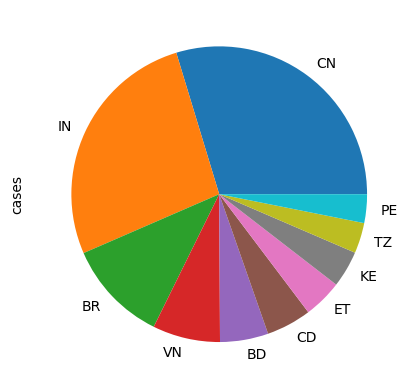

In [30]:
tidy.groupby("country").sum(numeric_only=True).\
    sort_values(by='cases', ascending=False)['cases'].head(10).plot(kind='pie')

## Variables are stored in both rows and columns (tricky)

The most **complicated form of messy data occurs when variables are stored in both rows and
columns**. We consider here daily weather data from the Global Historical Climatology Network
for one weather station (MX17004) in Mexico for five months in 2010. It has variables in
individual columns (id, year, month), spread across columns (day, d1–d31) and across rows
(tmin, tmax) (minimum and maximum temperature). Months with less than 31 days have
structural missing values for the last day(s) of the month. The element column is not a
variable; it stores the names of variables.

We'll only consider columns from d1 to d8 to save space.

Let's first create the dataframe.  This time, I create it using an array instead of a dictionary, just for the fun of doing something a bit different.

In [31]:
columns = ['id', 'year', 'month', 'element', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
data = [['MX17004', 2010, 1, 'tmax', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
        ['MX17004', 2010, 1, 'tmin', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
        ['MX17004', 2010, 2, 'tmax', np.nan, 27.3, 24.1, np.nan, np.nan, np.nan, np.nan, np.nan, ],
        ['MX17004', 2010, 2, 'tmin', np.nan, 14.4, 14.4, np.nan, np.nan, np.nan, np.nan, np.nan, ],
        ['MX17004', 2010, 3, 'tmax', np.nan, np.nan, np.nan, np.nan, 32.1, np.nan, np.nan, np.nan, ],
        ['MX17004', 2010, 3, 'tmin', np.nan, np.nan, np.nan, np.nan, 14.2, np.nan, np.nan, np.nan, ],
        ['MX17004', 2010, 4, 'tmax', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
        ['MX17004', 2010, 4, 'tmin', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
        ['MX17004', 2010, 5, 'tmax', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
        ['MX17004', 2010, 5, 'tmin', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,]
       ]
messy = pd.DataFrame(data=data, columns=columns); messy

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7,d8
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the values are not relevant.  However, filtering the NaN values is imposible here.  We need to melt the dataframe first.

In [32]:
molten = pd.melt(messy, 
                 id_vars=['id', 'year','month','element',],
                 var_name='day');
molten.dropna(inplace=True)
molten = molten.reset_index(drop=True)
molten

,id,year,month,element,day,value
0,MX17004,2010,2,tmax,d2,27.3
1,MX17004,2010,2,tmin,d2,14.4
2,MX17004,2010,2,tmax,d3,24.1
3,MX17004,2010,2,tmin,d3,14.4
4,MX17004,2010,3,tmax,d5,32.1
5,MX17004,2010,3,tmin,d5,14.2


This dataframe is not in tidy form yet.  First, the column `element` contains variable names.  Second, the columns `year, month, day` represent one variable: the date.  Let's fix the latter problem first.

In [33]:
def f(row):    
    return "%d-%02d-%02d" % (row['year'], row['month'], int(row['day'][1:]))
    
molten['date'] = molten.apply(f, axis=1)
molten = molten[['id', 'element','value','date']].copy()
molten

,id,element,value,date
0,MX17004,tmax,27.3,2010-02-02
1,MX17004,tmin,14.4,2010-02-02
2,MX17004,tmax,24.1,2010-02-03
3,MX17004,tmin,14.4,2010-02-03
4,MX17004,tmax,32.1,2010-03-05
5,MX17004,tmin,14.2,2010-03-05


In [34]:
molten['date'] = pd.to_datetime(molten['date'])

In [35]:
molten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       6 non-null      object        
 1   element  6 non-null      object        
 2   value    6 non-null      float64       
 3   date     6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 320.0+ bytes


In [36]:
molten

,id,element,value,date
0,MX17004,tmax,27.3,2010-02-02
1,MX17004,tmin,14.4,2010-02-02
2,MX17004,tmax,24.1,2010-02-03
3,MX17004,tmin,14.4,2010-02-03
4,MX17004,tmax,32.1,2010-03-05
5,MX17004,tmin,14.2,2010-03-05


Now we need to pivot the element column.  

In [37]:
tidy = molten.pivot(index='date',columns='element',values='value')
tidy

element,tmax,tmin
date,,
2010-02-02,27.3,14.4
2010-02-03,24.1,14.4
2010-03-05,32.1,14.2


<AxesSubplot: xlabel='date'>

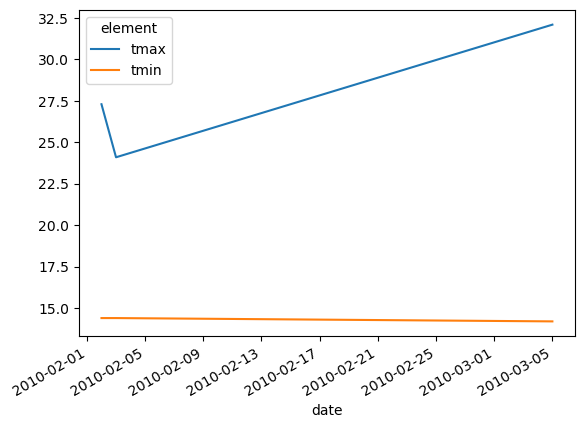

In [38]:
tidy.plot()

Wait a minute.  

Where is the id?

One way to keep it, is to move the id to an index with the `groupby()` function, and apply `pivot()` inside each group. 

In [39]:
tidy = molten.groupby('id').apply(pd.DataFrame.pivot,
                                  index='date',
                                  columns='element',
                                  values='value')
tidy

element             tmax  tmin
id      date                  
MX17004 2010-02-02  27.3  14.4
        2010-02-03  24.1  14.4
        2010-03-05  32.1  14.2

We are almost there.  We simply have to move id back as a column with the `reset_index()`.

In [40]:
tidy.reset_index(inplace=True)
tidy

element,id,date,tmax,tmin
0,MX17004,2010-02-02,27.3,14.4
1,MX17004,2010-02-03,24.1,14.4
2,MX17004,2010-03-05,32.1,14.2


We get rid of the `element` name.

In [41]:
tidy.columns.name = ''
tidy

,id,date,tmax,tmin
0,MX17004,2010-02-02,27.3,14.4
1,MX17004,2010-02-03,24.1,14.4
2,MX17004,2010-03-05,32.1,14.2


Et Voilà!

Well, it's quite messy we can achieve it by pivoting on MultiIndex

In [47]:
tidy = molten.pivot(index=['id','date'],columns='element',values='value')
tidy.columns.name = ''
tidy.reset_index(inplace=True)
tidy

,id,date,tmax,tmin
0,MX17004,2010-02-02,27.3,14.4
1,MX17004,2010-02-03,24.1,14.4
2,MX17004,2010-03-05,32.1,14.2


## Multiple types in one table

This example is used to illustrate two of the above problems.  

Let's create it. It is an excerpt from the Billboard top hits for 2000.

In [48]:
columns = ['year','artist','track','time','date entered','wk1','wk2','wk3',]

data = [[2000,"2,Pac","Baby Don't Cry","4:22","2000-02-26",87,82,72,],
        [2000,"2Ge+her","The Hardest Part Of ...","3:15","2000-09-02",91,87,92,],
        [2000,"3 Doors Down","Kryptonite","3:53","2000-04-08",81,70,68,],
        [2000,"98^0","Give Me Just One Nig...","3:24","2000-08-19",51,39,34,],
        [2000,"A*Teens","Dancing Queen","3:44","2000-07-08",97,97,96,],
        [2000,"Aaliyah","I Don't Wanna","4:15","2000-01-29",84,62,51,],
        [2000,"Aaliyah","Try Again","4:03","2000-03-18",59,53,38,],
        [2000,"Adams,Yolanda","Open My Heart","5:30","2000-08-26",76,76,74]
        ]

messy = pd.DataFrame(data=data, columns=columns)
messy

,year,artist,track,time,date entered,wk1,wk2,wk3
0,2000,"2,Pac",Baby Don't Cry,4:22,2000-02-26,87,82,72
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87,92
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70,68
3,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,51,39,34
4,2000,A*Teens,Dancing Queen,3:44,2000-07-08,97,97,96
5,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,84,62,51
6,2000,Aaliyah,Try Again,4:03,2000-03-18,59,53,38
7,2000,"Adams,Yolanda",Open My Heart,5:30,2000-08-26,76,76,74


This dataset is messy because there are several observations per row, in the columns wk1, wk2, wk3.

We can get one observation per row by metling the dataset.

In [49]:
molten = pd.melt(messy, 
                 id_vars=['year','artist','track','time','date entered'],
                 var_name = 'week',
                 value_name = 'rank',
                )
molten.sort_values(by=['date entered','week'], inplace=True)
molten.head()

,year,artist,track,time,date entered,week,rank
5,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84
13,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk2,62
21,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk3,51
0,2000,"2,Pac",Baby Don't Cry,4:22,2000-02-26,wk1,87
8,2000,"2,Pac",Baby Don't Cry,4:22,2000-02-26,wk2,82


We can clean the dataset further, first by turning week into number

In [50]:
molten['week'] = molten['week'].apply(lambda s: int(s[2:]))
molten.head()

,year,artist,track,time,date entered,week,rank
5,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,1,84
13,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,2,62
21,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,3,51
0,2000,"2,Pac",Baby Don't Cry,4:22,2000-02-26,1,87
8,2000,"2,Pac",Baby Don't Cry,4:22,2000-02-26,2,82


Second, we need the starting date of the week for each observation, instead of the date the track entered.

In [51]:
from datetime import datetime, timedelta

def increment_date(row):
    date = datetime.strptime(row['date entered'], "%Y-%m-%d")
    return date + timedelta(7) * (row['week'] - 1)

molten['date'] = molten.apply(increment_date, axis=1)
molten.drop('date entered', axis=1, inplace=True)
molten.head()

,year,artist,track,time,week,rank,date
5,2000,Aaliyah,I Don't Wanna,4:15,1,84,2000-01-29
13,2000,Aaliyah,I Don't Wanna,4:15,2,62,2000-02-05
21,2000,Aaliyah,I Don't Wanna,4:15,3,51,2000-02-12
0,2000,"2,Pac",Baby Don't Cry,4:22,1,87,2000-02-26
8,2000,"2,Pac",Baby Don't Cry,4:22,2,82,2000-03-04


Last, this dataset is **denormalized**.

This is fine for most statistical and machine learning packages, but we might want to normalize it, for example to be stored in an SQL database.

It means that we should **group information that is repeated every week** for a track in a separate table.

This information appears in columns `year ,artist, track, time`.  

In [52]:
tidy_track = molten[['year','artist','track','time']]\
            .groupby(['year','artist','track'])\
            .first()
tidy_track.reset_index(inplace=True)
tidy_track.reset_index(inplace=True)
tidy_track.rename(columns = {'index':'id'}, inplace=True)
tidy_track

,id,year,artist,track,time
0,0,2000,"2,Pac",Baby Don't Cry,4:22
1,1,2000,2Ge+her,The Hardest Part Of ...,3:15
2,2,2000,3 Doors Down,Kryptonite,3:53
3,3,2000,98^0,Give Me Just One Nig...,3:24
4,4,2000,A*Teens,Dancing Queen,3:44
5,5,2000,Aaliyah,I Don't Wanna,4:15
6,6,2000,Aaliyah,Try Again,4:03
7,7,2000,"Adams,Yolanda",Open My Heart,5:30


In [53]:
tidy_rank = pd.merge(molten, tidy_track, on='track')
tidy_rank = tidy_rank[['id', 'date', 'rank']]
tidy_rank.head()

,id,date,rank
0,5,2000-01-29,84
1,5,2000-02-05,62
2,5,2000-02-12,51
3,0,2000-02-26,87
4,0,2000-03-04,82


### The end

Making your data tidy will take you a lot of time. Keep it mind that there is
not always a single way of tidying data. It can dependent of the question
to specify what is an observation, a sample, and what is a feature, a variable.